In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Trimester-4\Machine Learning\Labs\Lab1\diabetes2.csv', encoding = "latin")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

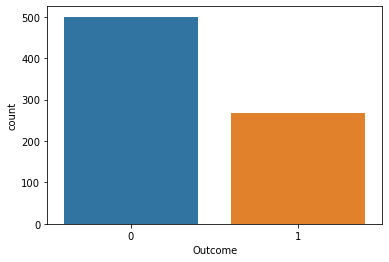

In [6]:
sns.countplot(x='Outcome',data=df)

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

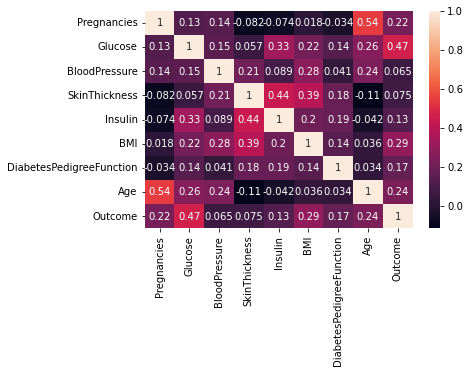

In [8]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

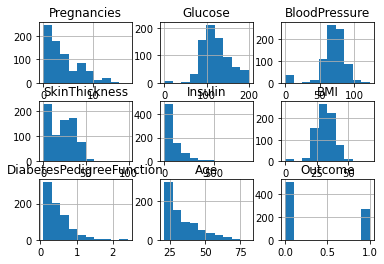

In [9]:
df.hist()

In [10]:
df['Pregnancies']=df['Pregnancies'].apply(np.log1p)

In [11]:
df['SkinThickness']=df['SkinThickness'].apply(np.log1p)

In [12]:
df['Insulin']=df['Insulin'].apply(np.log1p)

In [13]:
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].apply(np.log1p)

In [14]:
df['Age']=df['Age'].apply(np.log1p)

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

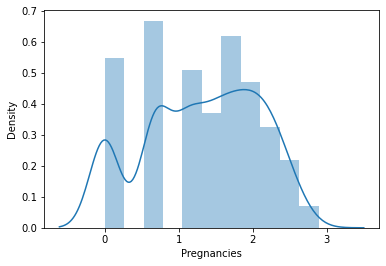

In [15]:
sns.distplot(df["Pregnancies"])

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

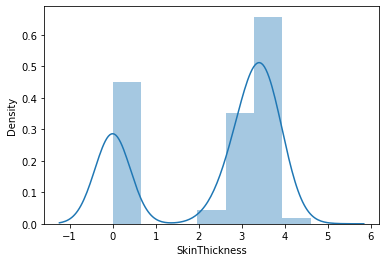

In [16]:
sns.distplot(df["SkinThickness"])

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

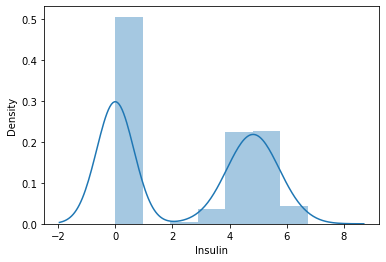

In [17]:
sns.distplot(df["Insulin"])

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

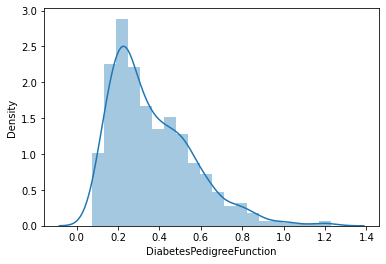

In [18]:
sns.distplot(df["DiabetesPedigreeFunction"])

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

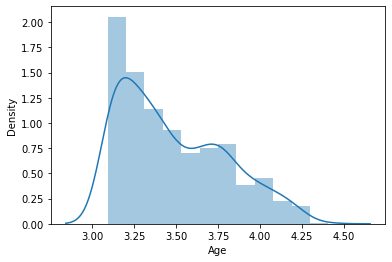

In [19]:
sns.distplot(df["Age"])

In [20]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
# Degree2

In [23]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

In [24]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 0.7748917748917749


In [ ]:
# Degree 3

In [25]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)

SVC(kernel='poly')

In [26]:
from sklearn.metrics import accuracy_score
predictions_polys = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_polys)
print("3rd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

3rd degree polynomial Kernel
Accuracy (normalized): 0.7748917748917749


In [ ]:
# Linear kernel

In [27]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [28]:
from sklearn.metrics import accuracy_score
predictions_polys = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_polys)
print("Accuracy (normalized): " + str(accuracy_poly))

Accuracy (normalized): 0.7748917748917749


In [29]:
# rbf kernel

model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [30]:
from sklearn.metrics import accuracy_score
predictions_polys = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_polys)
print("Accuracy (normalized): " + str(accuracy_poly))

Accuracy (normalized): 0.7705627705627706
